In [5]:
! pip install transformers -q

In [6]:
from transformers import pipeline


In [7]:
# tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
# model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")


In [9]:
emotion = pipeline('sentiment-analysis', model='arpanghoshal/EmoRoBERTa')

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


In [10]:
emotion_labels = emotion("I'm sorry that the order got delayed")


In [11]:
emotion_labels

[{'label': 'remorse', 'score': 0.7496781945228577}]

In [12]:
emotion_labels[0]['label']

'remorse'

In [58]:
import pandas as pd

In [59]:
large_text = pd.read_csv('ASR_data.csv')

In [60]:
large_text.shape

(1680, 2)

In [61]:
large_text.head()

,Sentence,content
0,0,the bungalow was pleasantly situated near the ...
1,1,don't ask me to carry an oily rag like that
2,2,are you looking for employment
3,3,she had your dark suit and greasy wash water a...
4,4,at twilight on the twelfth day we'll have chable


In [62]:
large_text = large_text[:1680]

In [63]:
large_text.shape

(1680, 2)

In [64]:
large_text['content'][1:10].apply(emotion)

1    [{'label': 'disapproval', 'score': 0.494108587...
2    [{'label': 'neutral', 'score': 0.9854458570480...
3    [{'label': 'neutral', 'score': 0.7298281192779...
4    [{'label': 'excitement', 'score': 0.9830625057...
5    [{'label': 'realization', 'score': 0.750612556...
6    [{'label': 'anger', 'score': 0.8766106963157654}]
7    [{'label': 'approval', 'score': 0.599025905132...
8    [{'label': 'amusement', 'score': 0.72298383712...
9    [{'label': 'neutral', 'score': 0.88116854429245}]
Name: content, dtype: object

In [65]:
def get_emotion_label(text):
  return(emotion(text)[0]['label'])

In [66]:
get_emotion_label("India played very well and the fans were amused")

'amusement'

In [67]:
large_text['content'][1:10].apply(get_emotion_label)

1    disapproval
2        neutral
3        neutral
4     excitement
5    realization
6          anger
7       approval
8      amusement
9        neutral
Name: content, dtype: object

In [68]:
large_text['emotion'] = large_text['content'].apply(get_emotion_label)

In [69]:
large_text

,Sentence,content,emotion
0,0,the bungalow was pleasantly situated near the ...,approval
1,1,don't ask me to carry an oily rag like that,disapproval
2,2,are you looking for employment,neutral
3,3,she had your dark suit and greasy wash water a...,neutral
4,4,at twilight on the twelfth day we'll have chable,excitement
...,...,...,...
1675,1675,pam gives driving lessons on thursdays,neutral
1676,1676,he rubbed his eyes sleepily with one huge paw,neutral
1677,1677,eight field guns were captured in position,neutral
1678,1678,aloneum siverware can often be flimsy,neutral


In [70]:
large_text.to_csv(r'ASR_Emotion.csv', index = False)

In [71]:
import seaborn as sns

Text(0.5, 1.0, 'Emotion Distribution')

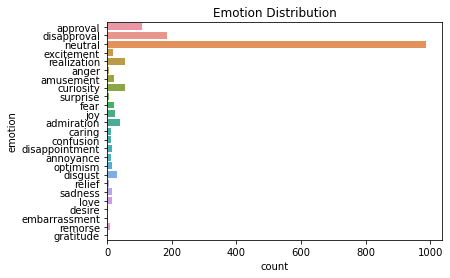

In [72]:
sns.countplot(data = large_text, y = 'emotion').set_title("Emotion Distribution")